In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [3]:
print (df_train.shape)
print (df_train.columns)

print (df_test.shape)
print (df_test.columns)

(11504798, 12)
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
(7669866, 11)
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


# Removing Duplicates and NAN values

In [4]:
df_train.duplicated().sum() # no duplicates

df_train.isnull().sum() # no NA values
df_train.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

#### Pair plots 

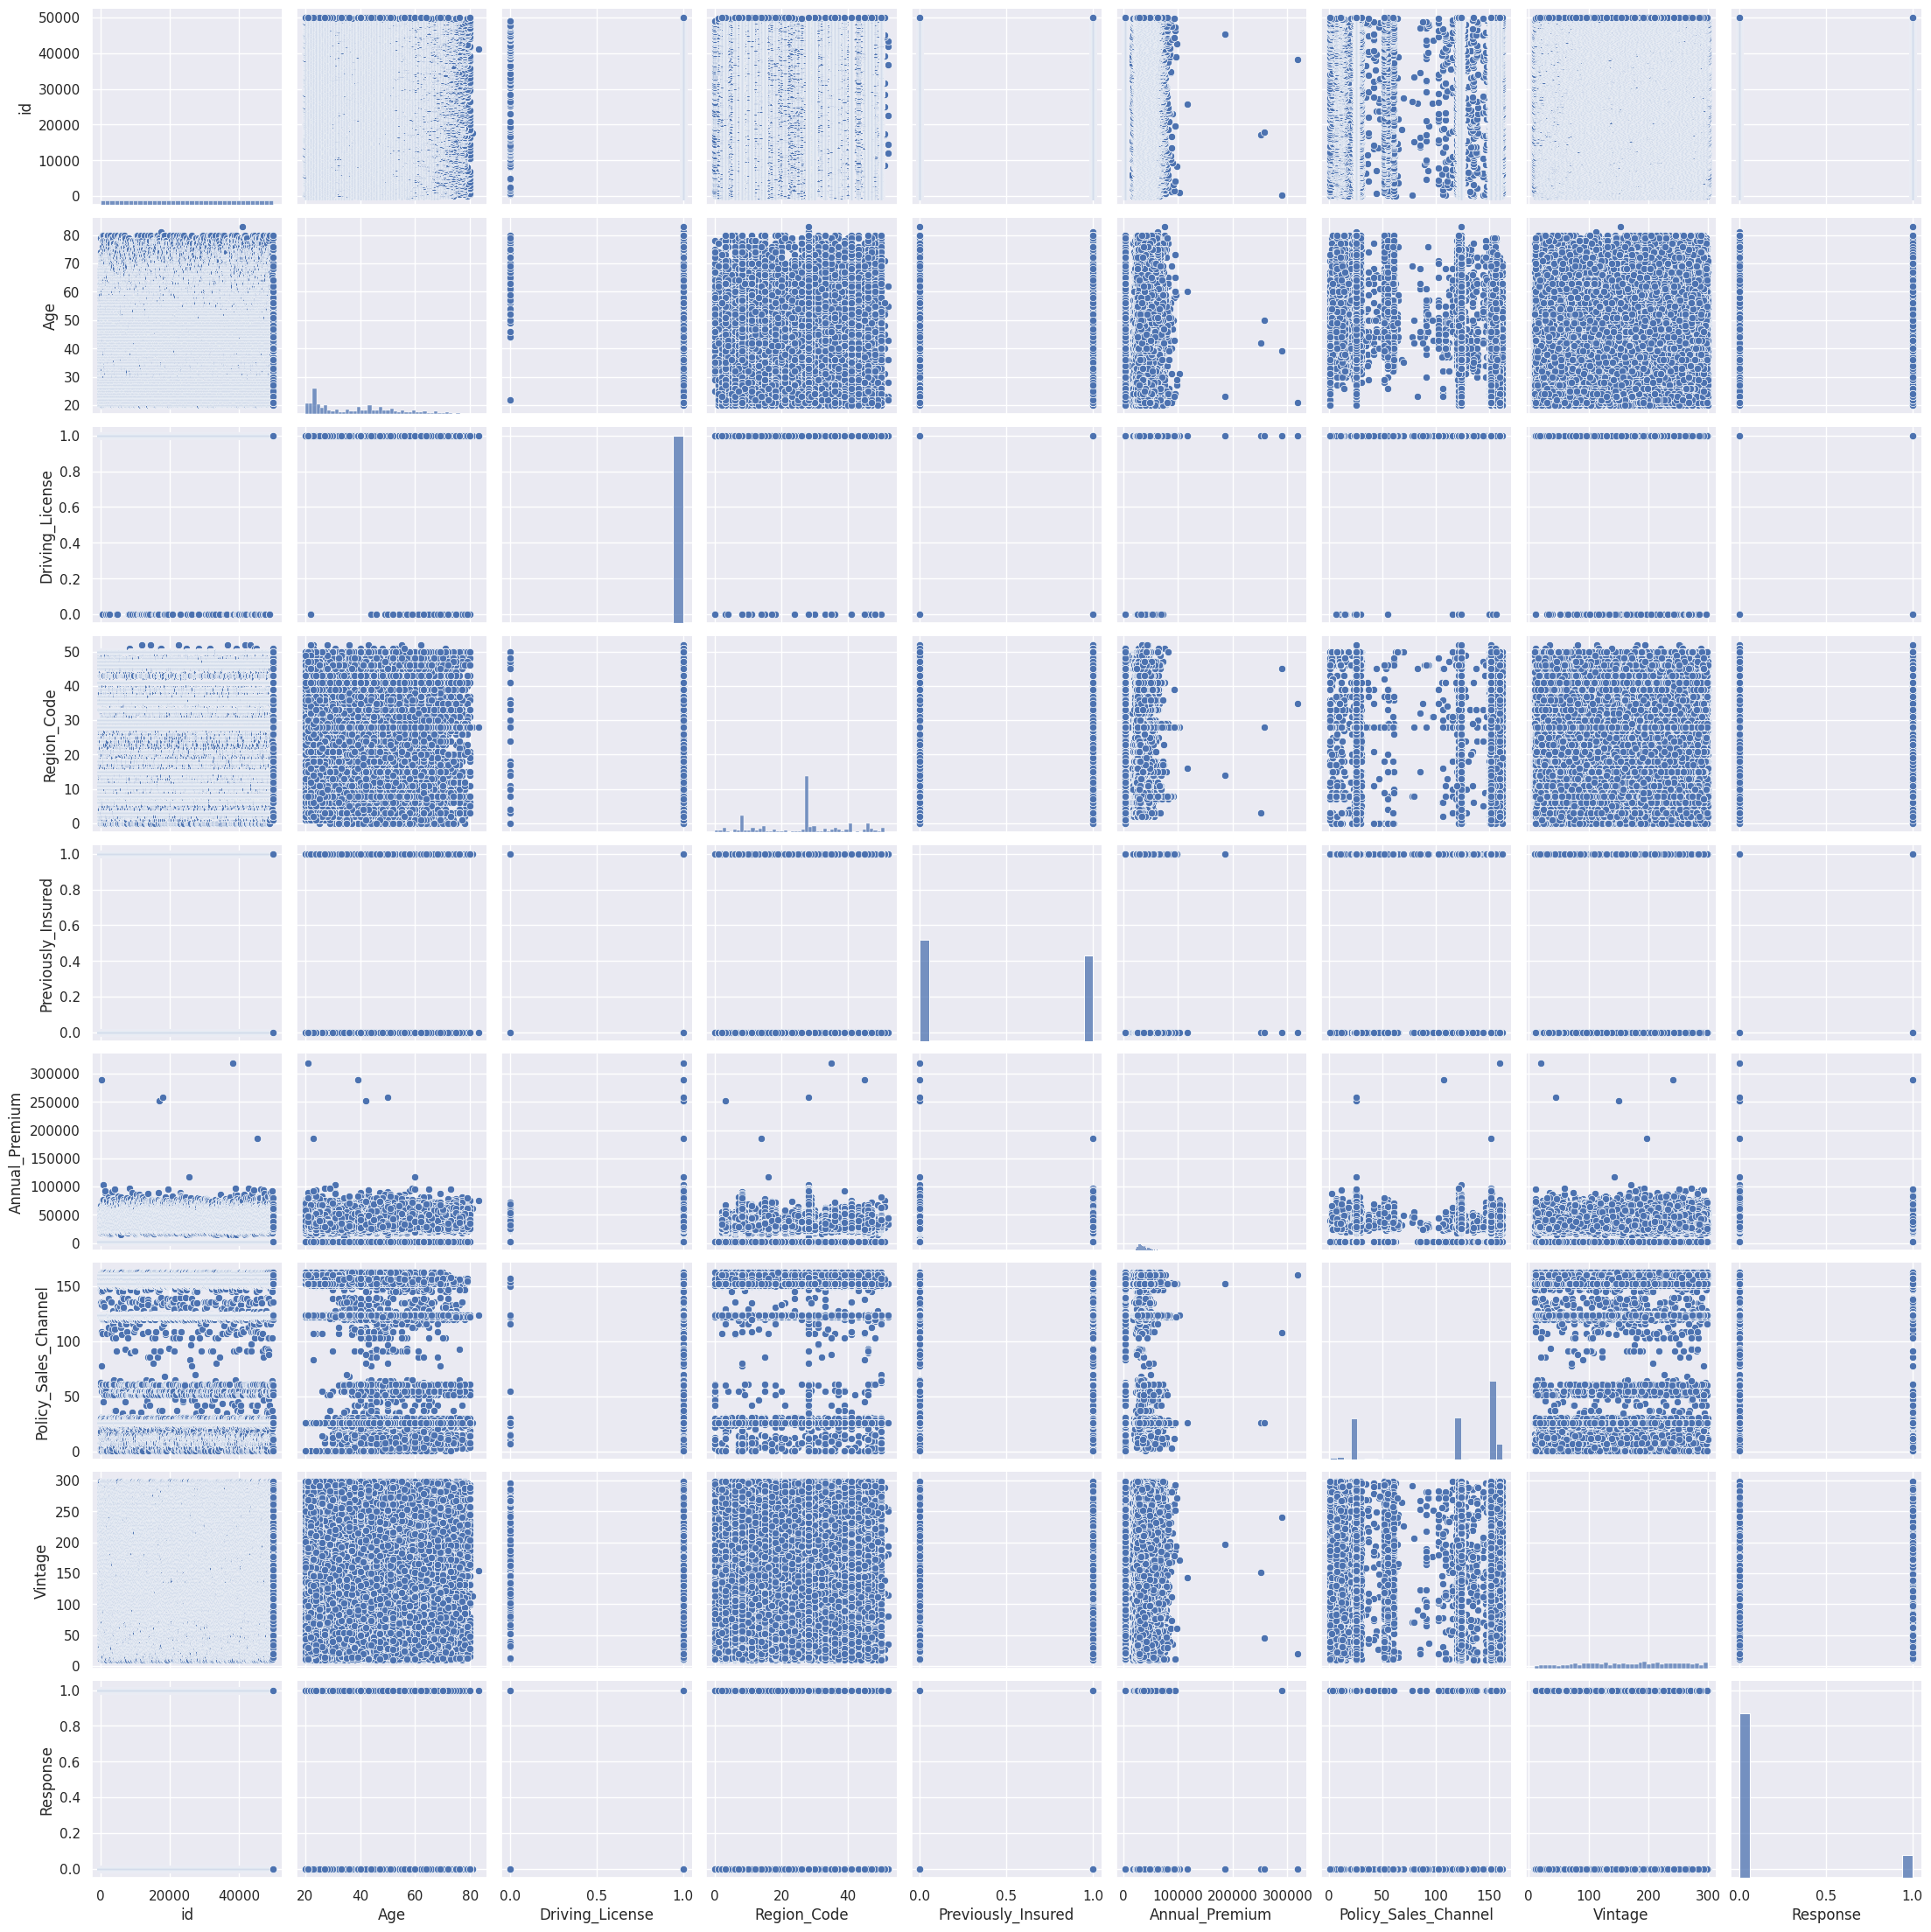

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set(style = "darkgrid")
with warnings.catch_warnings():
    warnings.simplefilter(action = 'ignore', category = FutureWarning)
    sns.pairplot(df_train[:50000])

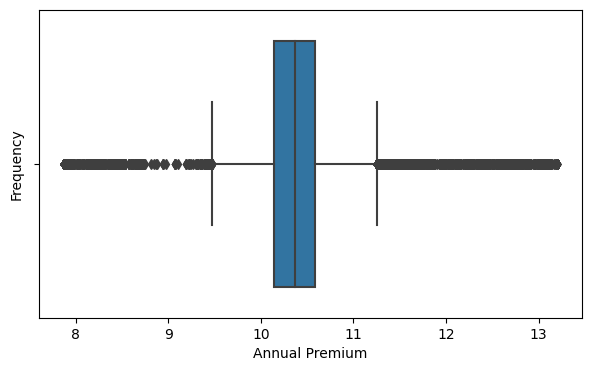

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7, 4))
sns.boxplot(x=np.log(df_train['Annual_Premium']))
#sns.boxplot(x=df_train['Annual_Premium'])
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


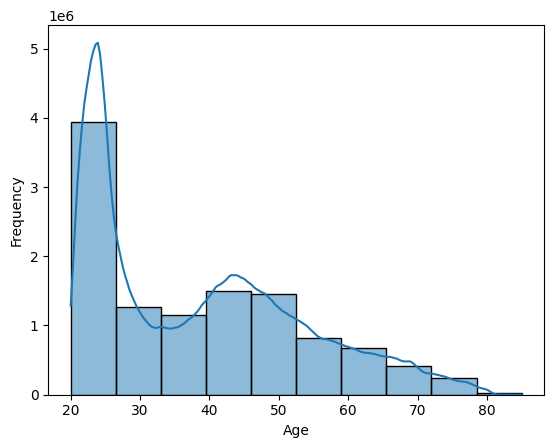

In [9]:
sns.histplot(x = df_train['Age'], kde = True, bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


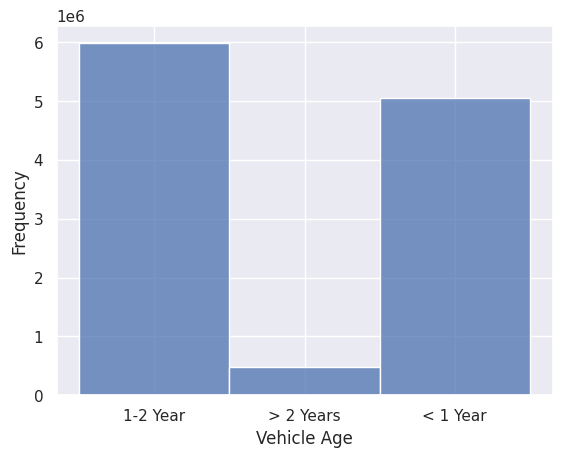

In [8]:
sns.histplot(x= df_train['Vehicle_Age'], kde = False, bins = 10)
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.show()

# Check Imbalance in the dataset

Response
0    10089739
1     1415059
Name: count, dtype: int64


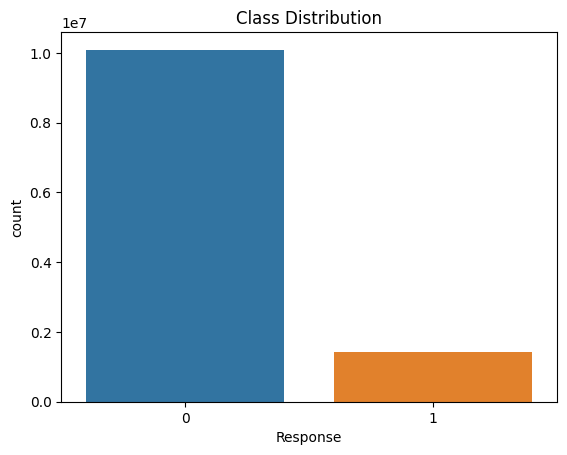

Text(0.5, 1.0, 'Check imbalance in training data')

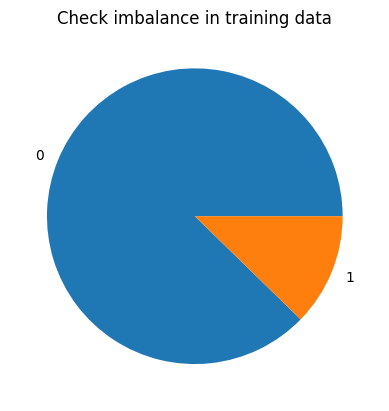

In [10]:
class_distribution = df_train['Response'].value_counts()
print (class_distribution)

sns.countplot(x= 'Response', data = df_train)
plt.title('Class Distribution')
plt.show()

fig, ax = plt.subplots()
ax.pie (class_distribution, labels=[0,1])
ax.set_title('Check imbalance in training data')

# Feature Engineering

In [5]:
print(df_train['Vehicle_Damage'].unique())
print(df_train['Vehicle_Age'].unique())
print(df_train['Gender'].unique())

['Yes' 'No']
['1-2 Year' '> 2 Years' '< 1 Year']
['Male' 'Female']


In [6]:
# the features Vehicle_Damage, Vehicle_Age and Gender are categorical values. 
# One hot encode the features using get_dummies

#convert the string feature into categorical feature
df_train['Gender'] = df_train['Gender'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')

#one hot encode using get_dummy
df_train = pd.get_dummies(df_train, columns=['Gender'], drop_first = True)
df_test = pd.get_dummies(df_test, columns=['Gender'], drop_first = True)

In [10]:
#print (df_train['Gender_Male'])
#print (df_test['Gender'])
from IPython.display import display
display (df_train['Vehicle_Age_< 1 Year'].head())
display (df_train['Vehicle_Age_> 2 Years'].head())
display (df_train['Vehicle_Damage_Yes'].head())
display (df_test['Vehicle_Age_< 1 Year'].head())
display (df_test['Vehicle_Age_> 2 Years'].head())
display (df_test['Vehicle_Damage_Yes'].head())

0    False
1    False
2     True
3    False
4    False
Name: Vehicle_Age_< 1 Year, dtype: bool

0    False
1     True
2    False
3    False
4    False
Name: Vehicle_Age_> 2 Years, dtype: bool

0     True
1     True
2    False
3     True
4    False
Name: Vehicle_Damage_Yes, dtype: bool

0     True
1    False
2    False
3     True
4    False
Name: Vehicle_Age_< 1 Year, dtype: bool

0    False
1    False
2    False
3    False
4    False
Name: Vehicle_Age_> 2 Years, dtype: bool

0    False
1     True
2     True
3    False
4    False
Name: Vehicle_Damage_Yes, dtype: bool

In [8]:
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].astype('category')
df_train = pd.get_dummies(df_train, columns = ['Vehicle_Age'], drop_first = True)

df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype('category')
df_test = pd.get_dummies(df_test, columns = ['Vehicle_Age'], drop_first = True)

In [9]:
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].astype('category')
df_train = pd.get_dummies(df_train, columns=['Vehicle_Damage'], drop_first = True)

df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].astype('category')
df_test = pd.get_dummies(df_test, columns = ['Vehicle_Damage'], drop_first = True)

In [11]:
from IPython.display import display
print(df_train.shape)
print(df_test.shape)

display(df_train.head())


(11504798, 13)
(7669866, 12)


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0,21,1,35.0,0,65101.0,124.0,187,0,True,False,False,True
1,1,43,1,28.0,0,58911.0,26.0,288,1,True,False,True,True
2,2,25,1,14.0,1,38043.0,152.0,254,0,False,True,False,False
3,3,35,1,1.0,0,2630.0,156.0,76,0,False,False,False,True
4,4,36,1,15.0,1,31951.0,152.0,294,0,False,False,False,False


# Splitting the Data set to X and Y

In [12]:
X_train = df_train[['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel',
             'Vintage','Gender_Male','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']]
Y_train = df_train['Response']

X_test = df_test[['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel',
             'Vintage','Gender_Male','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']]

display (X_train.head())
display (Y_train.head())

print (X_train.shape)
print (X_test.shape)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,21,1,35.0,0,65101.0,124.0,187,True,False,False,True
1,43,1,28.0,0,58911.0,26.0,288,True,False,True,True
2,25,1,14.0,1,38043.0,152.0,254,False,True,False,False
3,35,1,1.0,0,2630.0,156.0,76,False,False,False,True
4,36,1,15.0,1,31951.0,152.0,294,False,False,False,False


0    0
1    1
2    0
3    0
4    0
Name: Response, dtype: int64

(11504798, 11)
(7669866, 11)


# Handling imbalance dataset using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)
#print ("Before Resampling", X_train.value_counts())
print ("Y train values before resampling: ", Y_train.value_counts())
print()
#print ("After Resampling: ", x_train_smote.value_counts())
print ("Y train values after resampling: ", y_train_smote.value_counts())

Y train values before resampling:  Response
0    10089739
1     1415059
Name: count, dtype: int64

Y train values after resampling:  Response
0    10089739
1    10089739
Name: count, dtype: int64


# Scaling the Data

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_smote)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train_smote, test_size = 0.3,
                                                   random_state = 42)



In [16]:
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(14125634, 11)
(14125634,)
(6053844, 11)
(6053844,)


# Model 1: Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model = LogisticRegression()
param_grid = {
    'C': [0.001 ,0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

grid_search = GridSearchCV(estimator= model, param_grid= param_grid, cv= 10, scoring= 'accuracy')
grid_search.fit(x_train, y_train)

best_params= grid_search.best_params_
best_scores= grid_search.best_score_

print ("The best parameter is: ", best_params)
print ("The best scores is: ", best_scores)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print ("The model accuracy is: ", accuracy)

The best parameter is:  {'C': 0.001, 'penalty': 'l2'}
The best scores is:  0.8085308595890819
The model accuracy is:  0.8085543664488216


Confusion Matrix of Logistic regression is: 


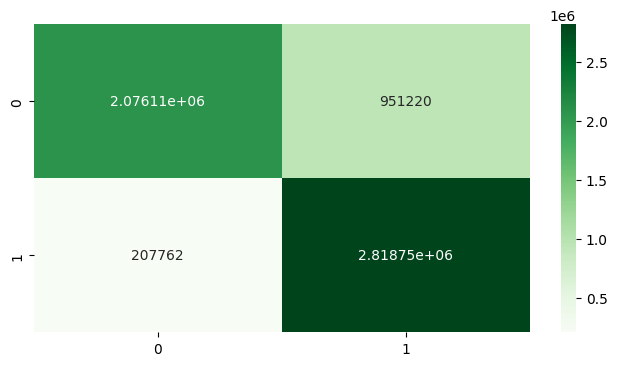

In [30]:
import seaborn as sns
#Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix of Logistic regression is: ")
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix,annot=True,fmt="g",cmap="Greens")
plt.show()

ROC Score is:  0.8672271051544737
--------------------------------------------------------------


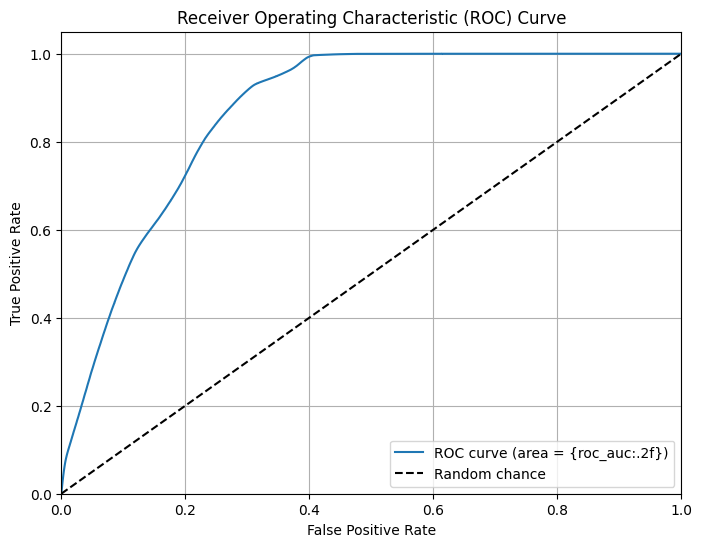

In [31]:
# Plot ROC Curve
# Calculate FPR and TPR
y_test_proba = best_model.predict_proba(x_test)[:,1]

roc_score = roc_auc_score(y_test, y_test_proba)
print ("ROC Score is: ", roc_score)
print ("--------------------------------------------------------------")
fpr, tpr, threshold = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = ''{roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Lets predict the output of the test data

#### -- Logistic Regression test score: 0.7867

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

x_test_scaled = scaler.fit_transform(X_test)
y_input_test_predict = best_model.predict(x_test_scaled)
print(y_input_test_predict[:15])

[0 1 1 0 0 0 1 0 0 0 1 0 0 0 0]


In [37]:
test_data_columns = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")
submission = pd.DataFrame({'id':test_data_columns['id'],'Response':y_input_test_predict})
#Visualize the first 5 rows
submission.tail()

,id,Response
7669861,19174659,1
7669862,19174660,0
7669863,19174661,0
7669864,19174662,1
7669865,19174663,0


In [40]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
